In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('/content/heart-disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1

In [ ]:
df1 =df.copy()
df1['sex'] = df1['sex'].replace({0: 'Female', 1: 'Male'})
df1['target'] = df1['target'].replace({0: 'No Heart Disease', 1: 'Heart Disease'})

In [ ]:
df1['target'].value_counts()

target
Heart Disease       165
No Heart Disease    138
Name: count, dtype: int64

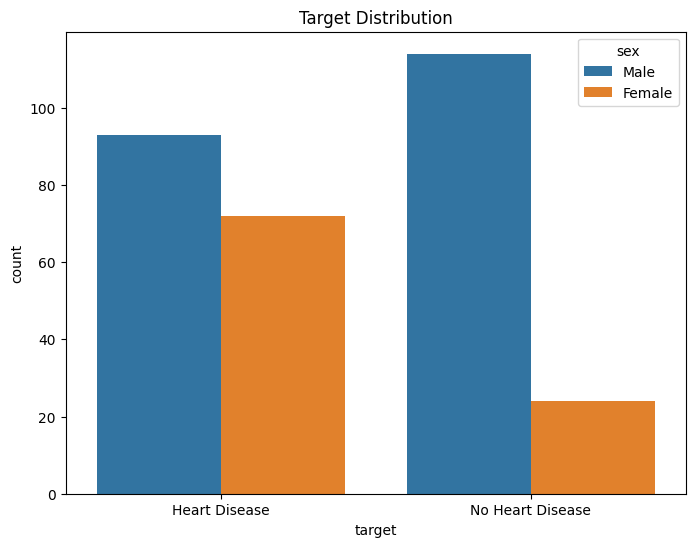

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df1,hue='sex')
plt.title('Target Distribution')
plt.show()

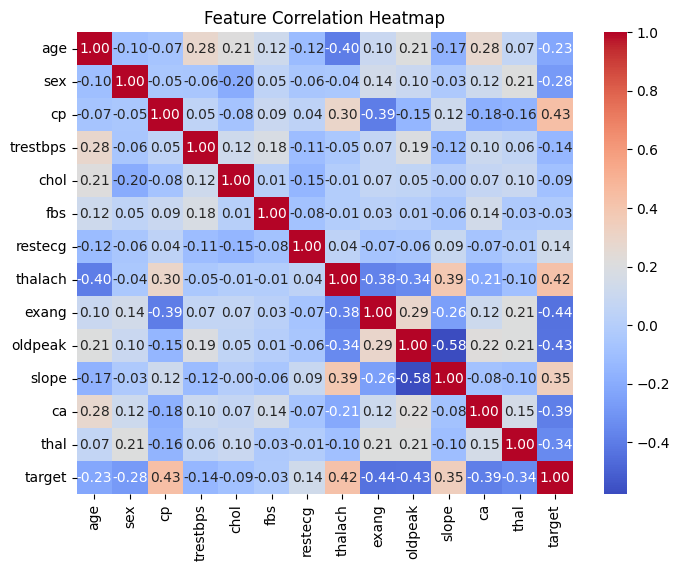

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

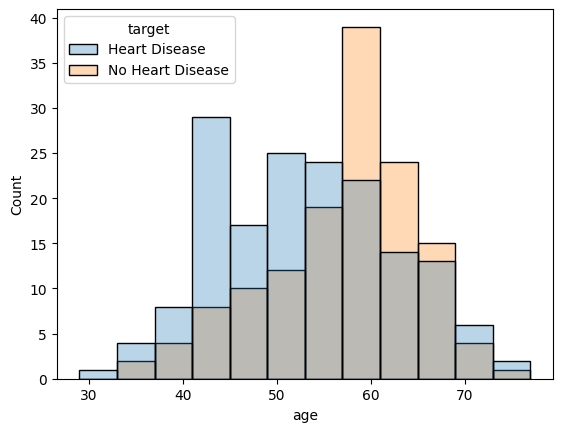

In [ ]:
sns.histplot(data=df1,x='age',hue='target',alpha=0.3)

<Axes: xlabel='age', ylabel='Count'>

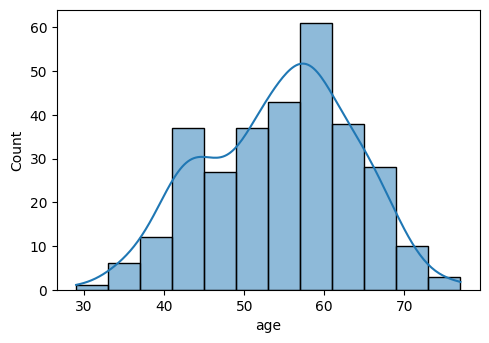

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)

Text(0.5, 0, 'Resting Blood Pressure')

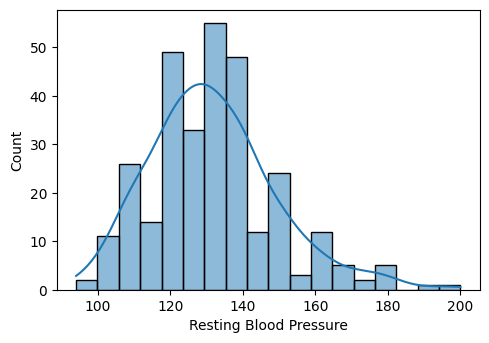

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
# trestbps = Resting blood pressure
# This is the measurement of blood pressure taken while a patient is at rest
sns.histplot(df['trestbps'], kde=True)
plt.xlabel('Resting Blood Pressure')

Text(0.5, 0, 'Serum Cholesterol Level')

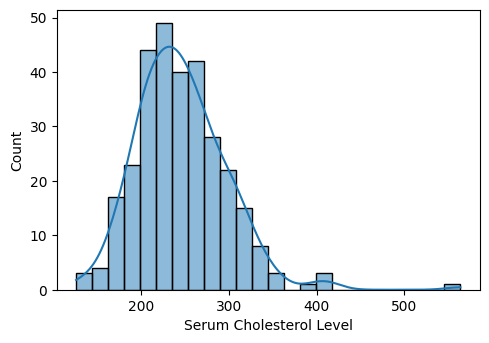

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
# chol = Serum cholesterol level
# This is the measurement of cholesterol in the blood
sns.histplot(df['chol'], kde=True)
plt.xlabel('Cholesterol Level')

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train, y_train)
predictions_log = log.predict(X_test)

In [ ]:
accuracy_log=accuracy_score(y_test, predictions_log)
print(f'Model accuracy: {accuracy_log * 100:.2f}%')
# Display confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions_log))

print('\nClassification Report:')
print(classification_report(y_test, predictions_log))

Model accuracy: 85.25%

Confusion Matrix:
[[25  4]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)

In [ ]:
accuracy_dt=accuracy_score(y_test, predictions_dt)
print(f'Model accuracy: {accuracy_dt * 100:.2f}%')
# Display confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions_dt))

print('\nClassification Report:')
print(classification_report(y_test, predictions_dt))

Model accuracy: 81.97%

Confusion Matrix:
[[26  3]
 [ 8 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [ ]:
accuracy_knn=accuracy_score(y_test, predictions_knn)
print(f'Model accuracy: {accuracy_knn * 100:.2f}%')
# Display confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions_knn))

print('\nClassification Report:')
print(classification_report(y_test, predictions_knn))

Model accuracy: 91.80%

Confusion Matrix:
[[27  2]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
predictions_svm = svm.predict(X_test)

In [ ]:
accuracy_svm=accuracy_score(y_test, predictions_svm)
print(f'Model accuracy: {accuracy_svm * 800:.2f}%')
# Display confusion matrix and classification report
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions_svm))

print('\nClassification Report:')
print(classification_report(y_test, predictions_svm))

Model accuracy: 86.89%

Confusion Matrix:
[[26  3]
 [ 5 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

